## Hands-On Project: Decision Tree, Random Forest, and K-Means Clustering with Titanic Dataset

This project demonstrates the implementation of **Decision Tree**, **Random Forest**, and **K-Means Clustering** algorithms using the Titanic dataset.

## 1. Introduction to the Dataset

We will use the Titanic dataset, available as a CSV file on [Kaggle](https://www.kaggle.com/c/titanic/data) or a GitHub repository. This dataset contains information about Titanic passengers, including demographic details, ticket class, and survival status.

### Data Columns:
- `PassengerId`: Unique identifier for each passenger.
- `Survived`: Survival status (0 = No, 1 = Yes).
- `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Passenger’s name.
- `Sex`: Gender of the passenger.
- `Age`: Age of the passenger.
- `SibSp`: Number of siblings/spouses aboard.
- `Parch`: Number of parents/children aboard.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

---



## 2. Data Preprocessing

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_scorea
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Fill missing values in 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to high percentage of missing values
data.drop('Cabin', axis=1, inplace=True)

In [3]:
# Encode 'Sex' and 'Embarked'
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Decision Tree Classifier

### Step 1: Train the Model

In [6]:
# Initialize and train the model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8156424581005587


## 4. Random Forest Classifier

### Step 1: Train the Model

In [8]:
# Initialize and train the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8268156424581006


## 5. K-Means Clustering

### Step 1: Train the Model

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Select relevant features for clustering
features = ["Age", "Fare", "SibSp", "Parch"]
X_clustering = data[features]

# Check for missing values
print("Missing values per column:\n", X_clustering.isnull().sum())


Missing values per column:
 Age      177
Fare       0
SibSp      0
Parch      0
dtype: int64


In [21]:

# Impute missing values with the mean
imputer = SimpleImputer(strategy="mean")
X_clustering = pd.DataFrame(imputer.fit_transform(X_clustering), columns=features)

In [20]:
# Initialize and train the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_clustering)

KMeans(n_clusters=2, random_state=42)

In [22]:
# Add cluster labels to the dataset
data["Cluster"] = kmeans.labels_

# Display sample of the clustered dataset
print(data[["Age", "Fare", "SibSp", "Parch", "Cluster"]].head())

    Age     Fare  SibSp  Parch  Cluster
0  22.0   7.2500      1      0        0
1  38.0  71.2833      1      0        0
2  26.0   7.9250      0      0        0
3  35.0  53.1000      1      0        0
4  35.0   8.0500      0      0        0


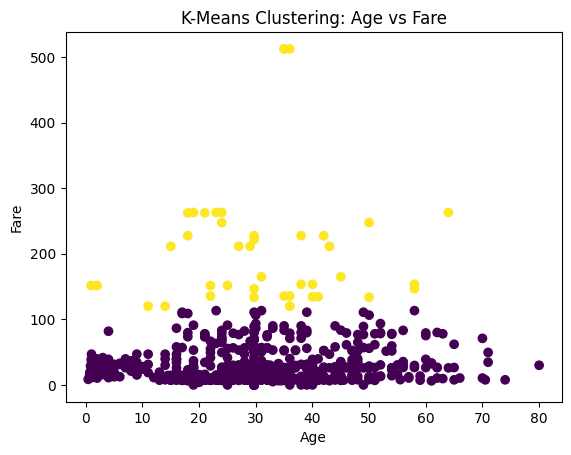

In [23]:
# Visualize the clusters (optional)
import matplotlib.pyplot as plt

plt.scatter(X_clustering["Age"], X_clustering["Fare"], c=kmeans.labels_, cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("K-Means Clustering: Age vs Fare")
plt.show()